# Vidio Plays Dataset

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read csv file
df = pd.read_csv('./data/plays_10.csv', error_bad_lines=False) # skip those problematic lines with error_bad_lines=False

b'Skipping line 7655: expected 41 fields, saw 42\n'
b'Skipping line 28027: expected 41 fields, saw 49\nSkipping line 29868: expected 41 fields, saw 42\n'
b'Skipping line 41317: expected 41 fields, saw 49\n'
b'Skipping line 50334: expected 41 fields, saw 42\nSkipping line 57183: expected 41 fields, saw 42\nSkipping line 61465: expected 41 fields, saw 49\n'
b'Skipping line 68522: expected 41 fields, saw 49\nSkipping line 74582: expected 41 fields, saw 42\n'
b'Skipping line 83509: expected 41 fields, saw 42\nSkipping line 94944: expected 41 fields, saw 42\n'
b'Skipping line 130829: expected 41 fields, saw 42\n'
b'Skipping line 163627: expected 41 fields, saw 42\n'
b'Skipping line 185137: expected 41 fields, saw 42\n'
b'Skipping line 197897: expected 41 fields, saw 42\nSkipping line 206057: expected 41 fields, saw 42\n'
b'Skipping line 213623: expected 41 fields, saw 42\nSkipping line 216084: expected 41 fields, saw 42\nSkipping line 227679: expected 41 fields, saw 49\n'
b'Skipping line 25

In [3]:
print('Number of rows:', len(df))
df.head()

Number of rows: 742582


,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,...,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
0,003f6dad4ab48a4e39ea262b19e3b42a4b53c2175078b3...,515dd4d7af23ae9ef5a2455bc97ee765fe86224ebaca71...,ed8d97adbba52562575973553003d9a13b103bc4693a6c...,3ba64f349972d4c7c05eb08e6b91db156a91af555ded6f...,NaN,175c473e6bbf67c337bdbd14c9dbdf01c627bfe5af17c1...,True,direct,tv-android,2020-02-15T12:07:00.000Z,...,1.11.0 (50),NaN,1263,vod,NaN,FTV SCTV - Kecubit Cinta Sahabat Chantiq,Movies,NaN,NaN,NaN
1,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,047f7b21bcb1a57119229958b11abe364ce1a279f8ae00...,88a404df574ba3c637bb99e94a2e51b16114f5da6f99cd...,36fd7b04f88ef3d6f16326ae4a39fcf2e4b1dec052919c...,NaN,6f8d1372d0128e141c7ef87649d9ec46328d327c2a21d4...,False,embed,web-mobile,2020-02-14T18:37:52.000Z,...,NaN,NaN,0,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
2,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,2623b2970635a15f1cf12bf9aa1e4d545135593e6a860c...,24abc04f114c9cb0c2087568093a909f04b3a567041fff...,4906987a7a6c3e27895e1adfd200d38e4f4fd87eb9ce96...,NaN,e73122fb4da263f0825c2ae5ac5c5a18da3a45c44b49e6...,False,embed,web-mobile,2020-02-15T11:58:24.000Z,...,NaN,NaN,8,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
3,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,4850defe8308149c097ff7adfe6fbdab1385a4d2ea7038...,f1279ae82e3c45f7591ad8e43f69a87d7444bf1c4b70b1...,adaf91b743f2f1d7b93819b22c016ca700182bd1a5b854...,NaN,1e8d1186fbc7677e10aa4a512f20ec01348e3e7f9e4cb7...,False,embed,web-mobile,2020-02-15T06:36:08.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN
4,0079c67ae8c7f6cbd44768f1988196c137326f3058d995...,ae0cb715407a6694fb052f4d25b9c87e97ab6ccafdb388...,151db218c9cbad4d9fa1b1196fd998a63a8314698580a6...,15689b6aebb6b896c7fdadb516c9754a34a2fcfb772dc3...,NaN,210d2693895749e26711ee890ef41c461994ce91a673aa...,False,embed,web-mobile,2020-02-15T01:53:03.000Z,...,NaN,NaN,53,vod,NaN,"Viral Seorang Siswi Dibully di Kelas, Gubernur...",News,NaN,NaN,NaN


In [4]:
# include related columns only
# to_include = ['']

## EDA (Exploratory Data Analysis)

In [5]:
df.describe()

,average_bitrate,total_bytes,buffer_duration,city,play_duration
count,707495.000000,7.425820e+05,7.425820e+05,0.0,742582.000000
mean,199515.374461,8.040253e+07,4.072597e+02,NaN,433.071647
std,141363.148294,5.136991e+08,7.188516e+04,NaN,1651.243972
min,144.000000,0.000000e+00,-4.639000e+00,NaN,0.000000
25%,625.000000,7.500000e+02,1.000000e-02,NaN,3.000000
50%,300000.000000,5.062500e+05,1.000000e+00,NaN,40.000000
75%,300000.000000,1.125000e+07,6.000000e+00,NaN,120.000000
max,300000.000000,5.065312e+10,6.117224e+07,NaN,135075.000000


In [6]:
print('Number of columns:', len(df.columns))
print(df.dtypes)

Number of columns: 41
hash_content_id       object
hash_play_id          object
hash_visit_id         object
hash_watcher_id       object
hash_film_id          object
hash_event_id         object
is_login                bool
playback_location     object
platform              object
play_time             object
end_time              object
referrer              object
average_bitrate      float64
bitrate_range         object
total_bytes            int64
buffer_duration      float64
referrer_group        object
completed             object
utm_source            object
utm_medium            object
utm_campaign          object
player_name           object
has_ad                  bool
flash_version         object
os_name               object
os_version            object
browser_name          object
browser_version       object
app_name              object
autoplay              object
is_premium              bool
app_version           object
city                 float64
play_duration        

In [7]:
total_rows = len(df)

print('[INFO] Checking for null/empty/NaN values on each column...')
for c in df.columns:
    null_count = df[c].isnull().sum()
    print("Number of empty values in column '{}': {} ({:.2f}%)".format(c, null_count, null_count/total_rows*100))

[INFO] Checking for null/empty/NaN values on each column...
Number of empty values in column 'hash_content_id': 0 (0.00%)
Number of empty values in column 'hash_play_id': 0 (0.00%)
Number of empty values in column 'hash_visit_id': 0 (0.00%)
Number of empty values in column 'hash_watcher_id': 0 (0.00%)
Number of empty values in column 'hash_film_id': 702057 (94.54%)
Number of empty values in column 'hash_event_id': 0 (0.00%)
Number of empty values in column 'is_login': 0 (0.00%)
Number of empty values in column 'playback_location': 0 (0.00%)
Number of empty values in column 'platform': 0 (0.00%)
Number of empty values in column 'play_time': 0 (0.00%)
Number of empty values in column 'end_time': 0 (0.00%)
Number of empty values in column 'referrer': 40463 (5.45%)
Number of empty values in column 'average_bitrate': 35087 (4.73%)
Number of empty values in column 'bitrate_range': 0 (0.00%)
Number of empty values in column 'total_bytes': 0 (0.00%)
Number of empty values in column 'buffer_dur

## Univariate Analysis

In [8]:
# labelling function
def autolabel(plot):
    for p in plot:
        h = p.get_height()
        ax.annotate('{}'.format(h),
                   xy=(p.get_x() + p.get_width()/2, h),
                   xytext=(0,3),
                   textcoords='offset points',
                   ha='center', va='bottom')

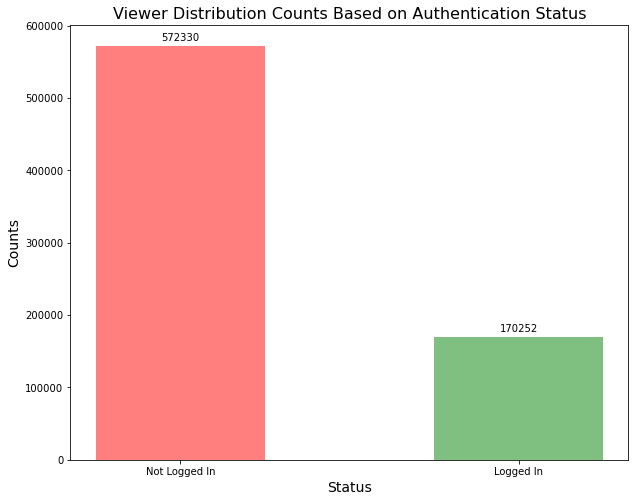

In [9]:
# number of users who were logged in to watch plays in the dataset
df_login = df[['is_login']].value_counts()
df_login = pd.pivot_table(df_login.to_frame(), values=0, index=[False, True], aggfunc=np.sum)
df_login = df_login.reset_index()
df_login  = df_login.rename(columns={'index':'is_login', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(2)
width = 0.5
bar = ax.bar(x, df_login['Counts'], color=['red', 'green'], alpha=.5, width=width)

ax.set_title('Viewer Distribution Counts Based on Authentication Status', fontsize=16)
ax.set_xlabel('Status', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(['Not Logged In', 'Logged In'])

autolabel(bar)

plt.show()

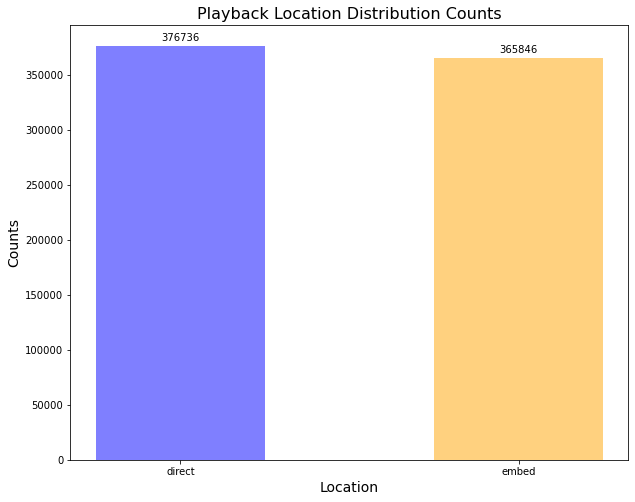

In [10]:
# playback locations
PLAYBACK = df['playback_location'].unique()
df_playback = df[['playback_location']].value_counts()
df_playback = pd.pivot_table(df_playback.to_frame(), values=0, index=PLAYBACK, aggfunc=np.sum)
df_playback = df_playback.reset_index()
df_playback  = df_playback.rename(columns={'index':'playback_location', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(2)
width = 0.5
bar = ax.bar(x, df_playback['Counts'], color=['blue', 'orange'], alpha=.5, width=width)

ax.set_title('Playback Location Distribution Counts', fontsize=16)
ax.set_xlabel('Location', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(['direct', 'embed'])

autolabel(bar)

plt.show()

      platform  Counts
0  app-android  180778
1      app-ios   12552
2   tv-android   41379
3     tv-tizen    7053
4     tv-webos    1168
5  web-desktop   71340
6   web-mobile  428312


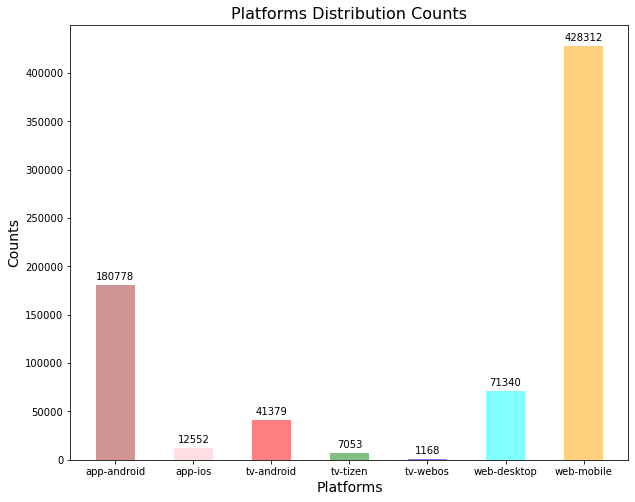

In [79]:
# platforms
PLATFORMS = df['platform'].unique()
df_platform = df[['platform']].value_counts()
df_platform = pd.pivot_table(df_platform.to_frame(), values=0, index=['platform'], aggfunc=np.sum)
df_platform = df_platform.reset_index()
df_platform  = df_platform.rename(columns={'index':'platform', 0: 'Counts'})

df_platform = df_platform.sort_values(by='platform')
print(df_platform)

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(PLATFORMS))
width = 0.5
bar = ax.bar(x, df_platform['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Platforms Distribution Counts', fontsize=16)
ax.set_xlabel('Platforms', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_platform['platform'].unique())

autolabel(bar)

plt.show()

In [12]:
import re
from urllib.parse import urlparse

# get referrer
non_link_referrer = {}
link_referrer = {}

for r in df['referrer']:
    if '/' not in str(r):
        if r not in non_link_referrer:
            non_link_referrer[str(r)] = 1
        else:
            non_link_referrer[str(r)] += 1
    else:
#         print(r)
        domain = urlparse(r).netloc
#         domain = re.findall(r'\..+\.', domain)
#         domain = domain[0][1:-1]
        
#         print('link:', r)
#         referrer_name = re.findall(r'(^.+://)\..+/', r)
#         referrer_name = referrer_name[0][1:]
#         print('referrer name:', referrer_name)
        
        if domain not in link_referrer:
            link_referrer[domain] = 1
        else:
            link_referrer[domain] += 1

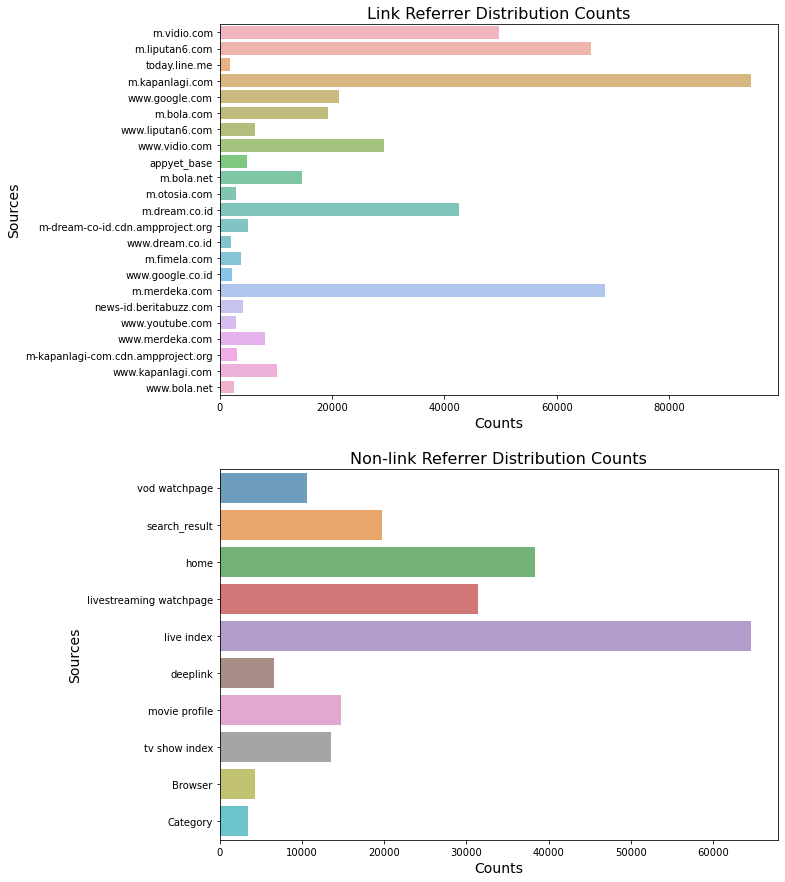

In [74]:
# plot referrer
link_mean = 0
for k, v in link_referrer.items():
    link_mean += v
link_mean = link_mean / len(link_referrer)

df_link_referrer = pd.DataFrame.from_dict(link_referrer, columns=['Counts'], orient='index')
df_link_referrer = df_link_referrer.reset_index()
df_link_referrer = df_link_referrer[df_link_referrer['Counts'] > link_mean]

non_link_mean = 0
for k, v in non_link_referrer.items():
    non_link_mean += v
non_link_mean = non_link_mean / len(non_link_referrer)

df_non_link_referrer = pd.DataFrame.from_dict(non_link_referrer, columns=['Counts'], orient='index')
df_non_link_referrer = df_non_link_referrer.reset_index()
df_non_link_referrer = df_non_link_referrer[df_non_link_referrer['Counts'] > non_link_mean]

fig, ax = plt.subplots(2, 1, figsize=(10,15))

sns.barplot(data=df_link_referrer, x='Counts', y='index', alpha=.7, ax=ax[0])
ax[0].set_title('Link Referrer Distribution Counts', fontsize=16)
ax[0].set_yticklabels(labels=df_link_referrer[df_link_referrer['Counts']>link_mean]['index'])
ax[0].set_ylabel('Sources', fontsize=14)
ax[0].set_xlabel('Counts', fontsize=14)

sns.barplot(data=df_non_link_referrer, x='Counts', y='index', alpha=.7, ax=ax[1])
ax[1].set_title('Non-link Referrer Distribution Counts', fontsize=16)
ax[1].set_yticklabels(labels=df_non_link_referrer[df_non_link_referrer['Counts']>non_link_mean]['index'])
ax[1].set_ylabel('Sources', fontsize=14)
ax[1].set_xlabel('Counts', fontsize=14)

plt.show()

  bitrate_range  Counts
0         0-200  237488
1       200-500  470007
2       unknown   35087


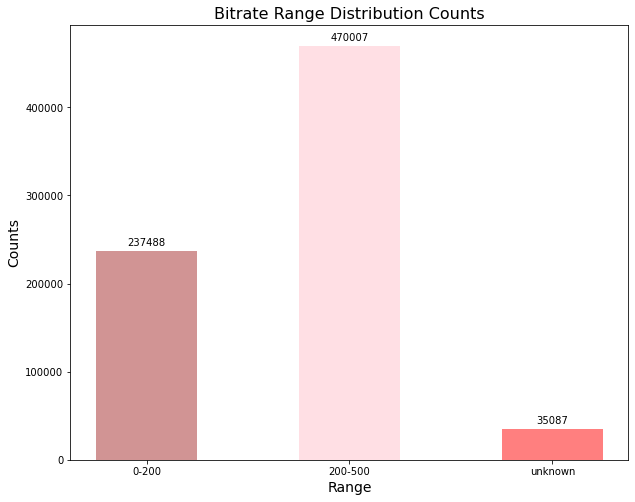

In [14]:
# bitrate range
BITRANGE = df['bitrate_range'].unique()
df_bitrange= df[['bitrate_range']].value_counts()
df_bitrange = pd.pivot_table(df_bitrange.to_frame(), values=0, index=BITRANGE, aggfunc=np.sum)
df_bitrange = df_bitrange.reset_index()
df_bitrange  = df_bitrange.rename(columns={'index':'bitrate_range', 0: 'Counts'})
print(df_bitrange)

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(BITRANGE))
width = 0.5
bar = ax.bar(x, df_bitrange['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Bitrate Range Distribution Counts', fontsize=16)
ax.set_xlabel('Range', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(['0-200', '200-500', 'unknown'])

autolabel(bar)

plt.show()

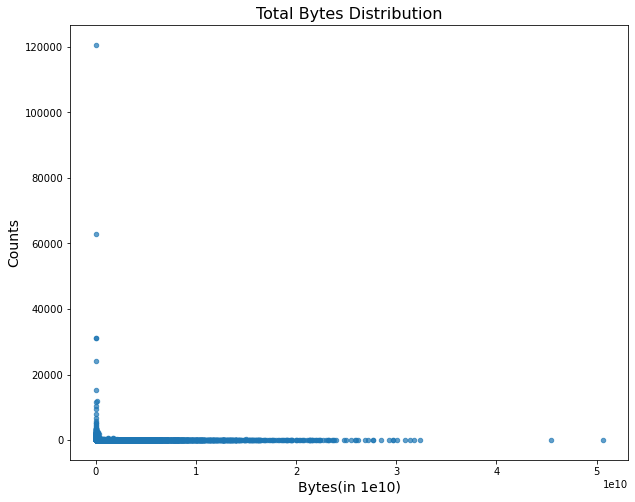

In [15]:
# total bytes
BYTES = df['total_bytes'].unique()
df_bytes= df[['total_bytes']].value_counts()
df_bytes = pd.pivot_table(df_bytes.to_frame(), values=0, index=BYTES, aggfunc=np.sum)
df_bytes = df_bytes.reset_index()
df_bytes  = df_bytes.rename(columns={'index':'total_bytes', 0: 'Counts'})

df_bytes.plot(kind='scatter', x='total_bytes', y='Counts', figsize=(10,8), alpha=.7)
plt.title('Total Bytes Distribution', fontsize=16)
plt.xlabel('Bytes(in 1e10)', fontsize=14)
plt.ylabel('Counts', fontsize=14)

plt.show()

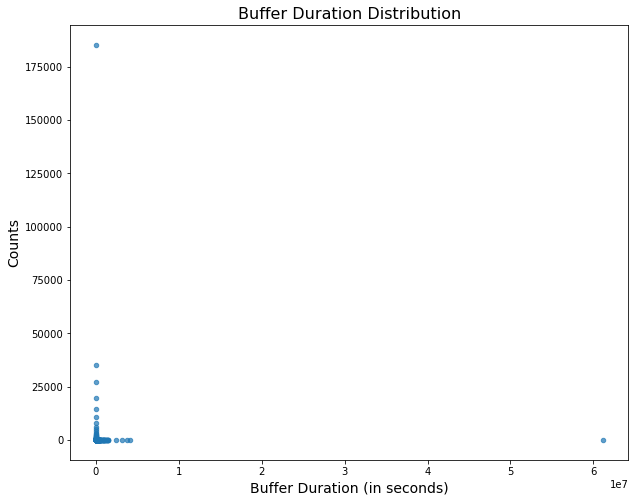

In [16]:
# buffer duration
BUFFER_DURATION = df['buffer_duration'].unique()
df_buffer_duration= df[['buffer_duration']].value_counts()
df_buffer_duration = pd.pivot_table(df_buffer_duration.to_frame(), values=0, index=BUFFER_DURATION, aggfunc=np.sum)
df_buffer_duration = df_buffer_duration.reset_index()
df_buffer_duration  = df_buffer_duration.rename(columns={'index':'buffer_duration', 0: 'Counts'})

df_buffer_duration.plot(kind='scatter', x='buffer_duration', y='Counts', figsize=(10,8), alpha=.7)
plt.title('Buffer Duration Distribution', fontsize=16)
plt.xlabel('Buffer Duration (in seconds)', fontsize=14)
plt.ylabel('Counts', fontsize=14)

plt.show()

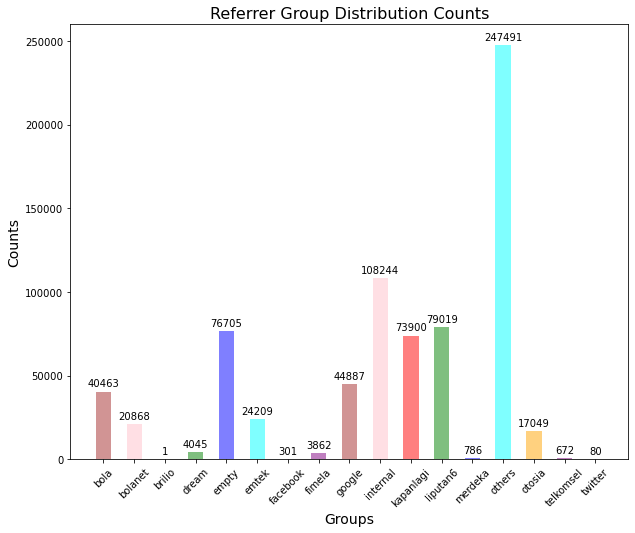

In [17]:
# referrer group
GROUP = df['referrer_group'].unique()
df_refgroup = df[['referrer_group']].value_counts()
df_refgroup = pd.pivot_table(df_refgroup.to_frame(), values=0, index=GROUP, aggfunc=np.sum)
df_refgroup = df_refgroup.reset_index()
df_refgroup  = df_refgroup.rename(columns={'index':'referrer_group', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(GROUP))
width = 0.5
bar = ax.bar(x, df_refgroup['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Referrer Group Distribution Counts', fontsize=16)
ax.set_xlabel('Groups', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_refgroup['referrer_group'], rotation=45)

autolabel(bar)

plt.show()

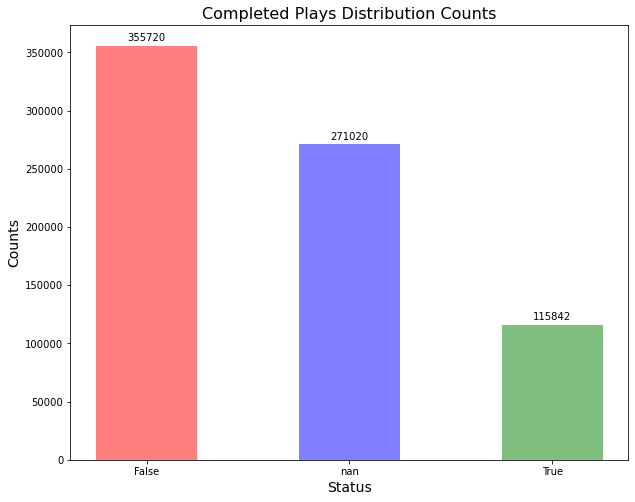

In [18]:
# completed
COMPLETED = df['completed'].unique()
COMPLETED[-1] = 'Not Specified'
df_completed = df['completed'].value_counts(dropna=False)
df_completed = df_completed.reset_index()
df_completed  = df_completed.rename(columns={'index':'completed', 'completed': 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(COMPLETED))
width = 0.5
bar = ax.bar(x, df_completed['Counts'], color=['red', 'blue', 'green'], alpha=.5, width=width)

ax.set_title('Completed Plays Distribution Counts', fontsize=16)
ax.set_xlabel('Status', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_completed['completed'])

autolabel(bar)

plt.show()

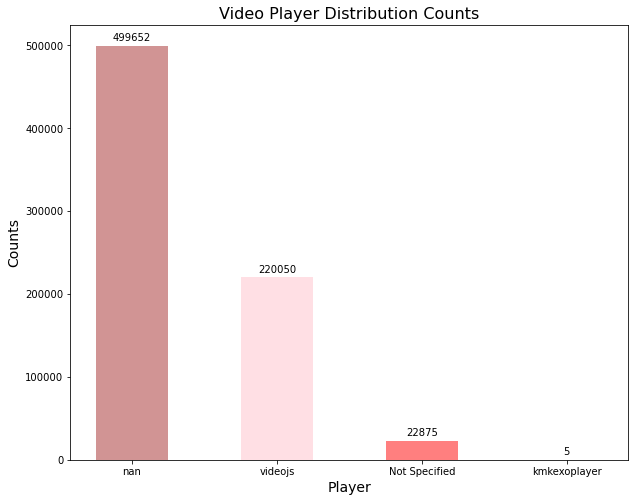

In [19]:
# player name
PLAYER = df['player_name'].unique()
PLAYER[2] = 'Not Specified'
df_player = df['player_name'].value_counts(dropna=False)
df_player = df_player.to_frame().reset_index()
df_player  = df_player.rename(columns={'index':'player', 'player_name': 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(PLAYER))
width = 0.5
bar = ax.bar(x, df_player['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Video Player Distribution Counts', fontsize=16)
ax.set_xlabel('Player', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(PLAYER)

autolabel(bar)

plt.show()

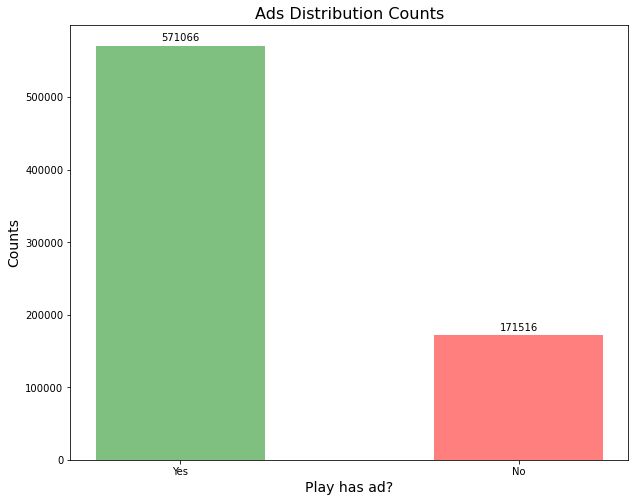

In [20]:
# ads
AD = df['has_ad'].unique()
df_ad = df['has_ad'].value_counts()
df_ad = df_ad.to_frame().reset_index()
df_ad  = df_ad.rename(columns={'index':'has_ad', 'has_ad': 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(AD))
width = 0.5
bar = ax.bar(x, df_ad['Counts'], color=['green', 'red'], alpha=.5, width=width)

ax.set_title('Ads Distribution Counts', fontsize=16)
ax.set_xlabel('Play has ad?', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(['Yes', 'No'])

autolabel(bar)

plt.show()

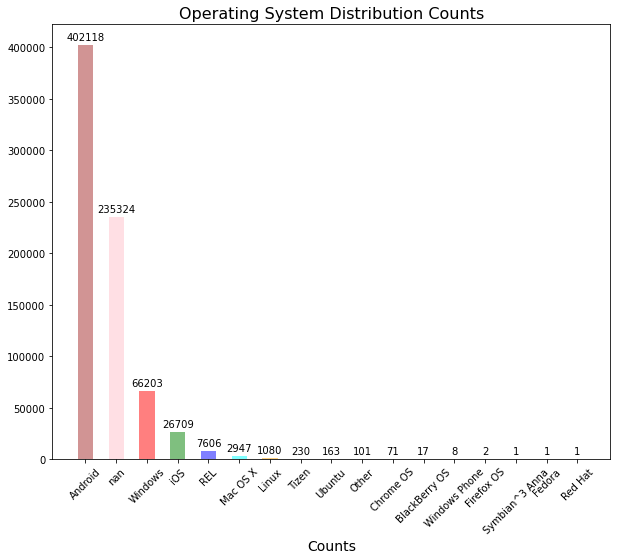

In [21]:
# os name
OS = df['os_name'].unique()
df_os = df['os_name'].value_counts(dropna=False)
df_os = df_os.to_frame().reset_index()
df_os  = df_os.rename(columns={'index':'os_name', 'os_name': 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(OS))
width = 0.5
bar = ax.bar(x, df_os['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Operating System Distribution Counts', fontsize=16)
ax.set_xlabel('OS', fontsize=14)
ax.set_xlabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_os['os_name'], rotation=45)

autolabel(bar)

plt.show()

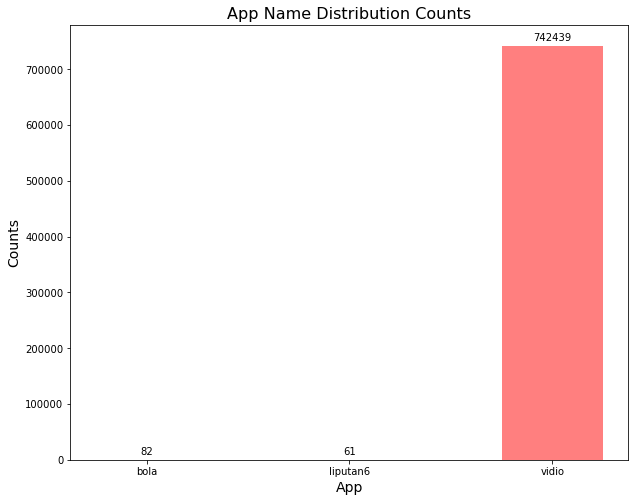

In [22]:
# app name
APP = df['app_name'].unique()
df_appname = df[['app_name']].value_counts()
df_appname = pd.pivot_table(df_appname.to_frame(), values=0, index=APP, aggfunc=np.sum)
df_appname = df_appname.reset_index()
df_appname  = df_appname.rename(columns={'index':'app_name', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(APP))
width = 0.5
bar = ax.bar(x, df_appname['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('App Name Distribution Counts', fontsize=16)
ax.set_xlabel('App', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_appname['app_name'])

autolabel(bar)

plt.show()

  autoplay  Counts
0    False  379849
1      NaN  271167
2     True   91566


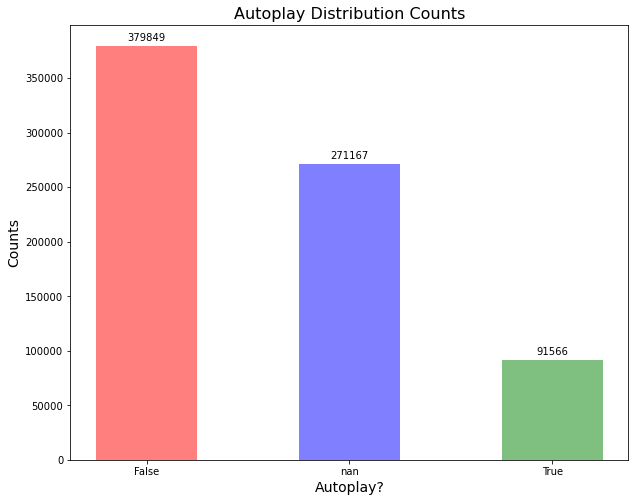

In [23]:
# autoplay
AUTO = df['autoplay'].unique()
df_auto = df['autoplay'].value_counts(dropna=False)
df_auto = df_auto.to_frame().reset_index()
df_auto  = df_auto.rename(columns={'index':'autoplay', 'autoplay': 'Counts'})
print(df_auto)

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(AUTO))
width = 0.5
bar = ax.bar(x, df_auto['Counts'], color=['red','blue', 'green', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Autoplay Distribution Counts', fontsize=16)
ax.set_xlabel('Autoplay?', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_auto['autoplay'])

autolabel(bar)

plt.show()

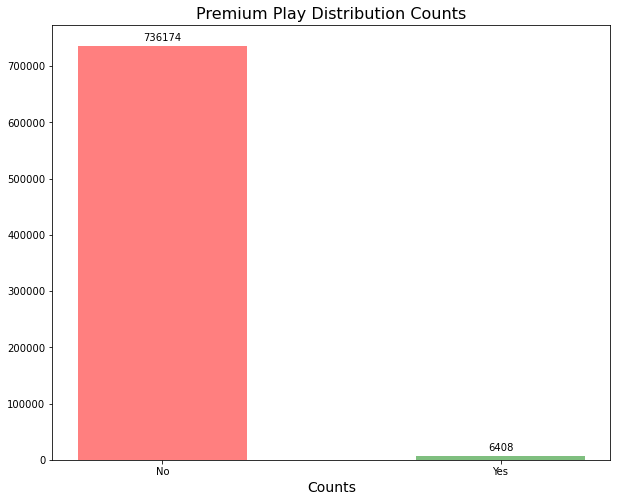

In [24]:
# premium
PREMIUM = df['is_premium'].unique()
df_premium = df[['is_premium']].value_counts()
df_premium = pd.pivot_table(df_premium.to_frame(), values=0, index=PREMIUM, aggfunc=np.sum)
df_premium = df_premium.reset_index()
df_premium  = df_premium.rename(columns={'index':'is_premium', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(PREMIUM))
width = 0.5
bar = ax.bar(x, df_premium['Counts'], color=['red','green', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Premium Play Distribution Counts', fontsize=16)
ax.set_xlabel('Premium?', fontsize=14)
ax.set_xlabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(['No', 'Yes'])

autolabel(bar)

plt.show()

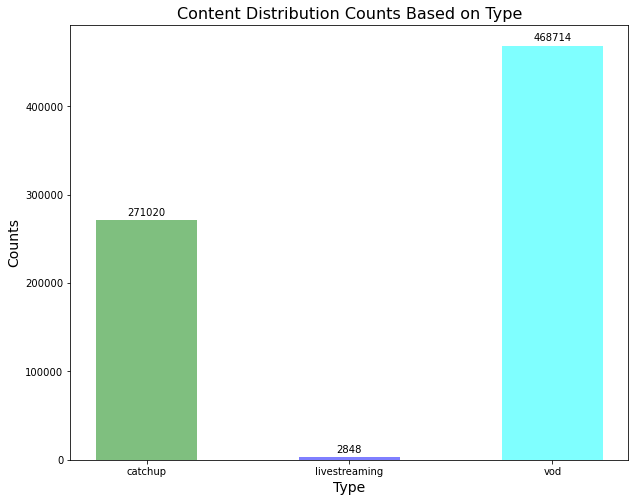

In [25]:
# content type
CONTENT = df['content_type'].unique()
df_content = df[['content_type']].value_counts()
df_content = pd.pivot_table(df_content.to_frame(), values=0, index=CONTENT, aggfunc=np.sum)
df_content = df_content.reset_index()
df_content  = df_content.rename(columns={'index':'content_type', 0: 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(CONTENT))
width = 0.5
bar = ax.bar(x, df_content['Counts'], color=['green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Content Distribution Counts Based on Type', fontsize=16)
ax.set_xlabel('Type', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_content['content_type'])

autolabel(bar)

plt.show()

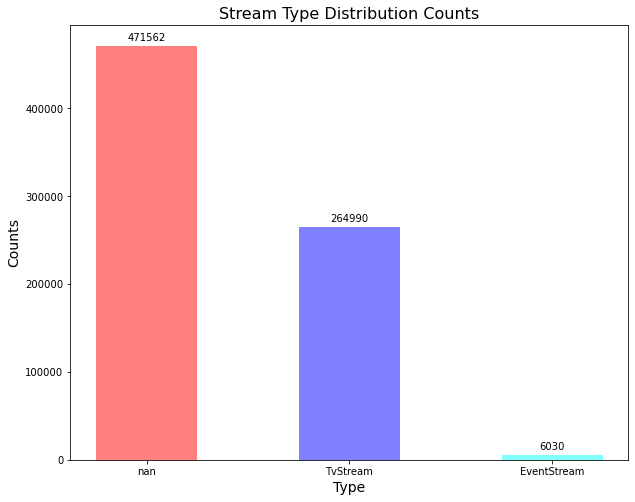

In [26]:
# stream type
STREAM = df['stream_type'].unique()
STREAM[0] = 'Not Specified'
df_stream = df['stream_type'].value_counts(dropna=False)
df_stream = df_stream.to_frame().reset_index()
df_stream  = df_stream.rename(columns={'index':'stream_type', 'stream_type': 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(AUTO))
width = 0.5
bar = ax.bar(x, df_stream['Counts'], color=['red', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Stream Type Distribution Counts', fontsize=16)
ax.set_xlabel('Type', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_stream['stream_type'])

autolabel(bar)

plt.show()

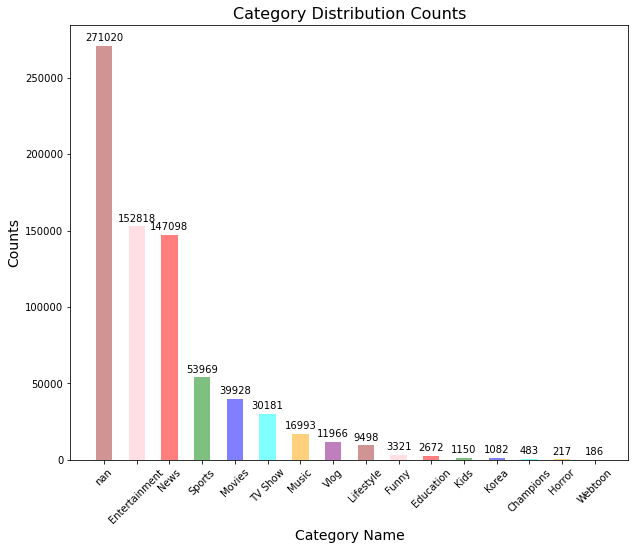

In [27]:
# category name
CATEGORY = df['category_name'].unique()
CATEGORY[4] = 'Not Specified'
df_category = df['category_name'].value_counts(dropna=False)
df_category = df_category.to_frame().reset_index()
df_category  = df_category.rename(columns={'index':'category_name', 'category_name': 'Counts'})

fig, ax = plt.subplots(figsize=(10,8))
x = np.arange(len(CATEGORY))
width = 0.5
bar = ax.bar(x, df_category['Counts'], color=['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple'], alpha=.5, width=width)

ax.set_title('Category Distribution Counts', fontsize=16)
ax.set_xlabel('Category Name', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_category['category_name'], rotation=45)

autolabel(bar)

plt.show()

## Feature Engineering

In [28]:
import dateutil.parser

start = df['play_time']
end = df['end_time']

duration = []
for s, e in zip(start, end):
    diff = dateutil.parser.parse(e) - dateutil.parser.parse(s)
    duration.append(diff.seconds)

df['duration'] = duration

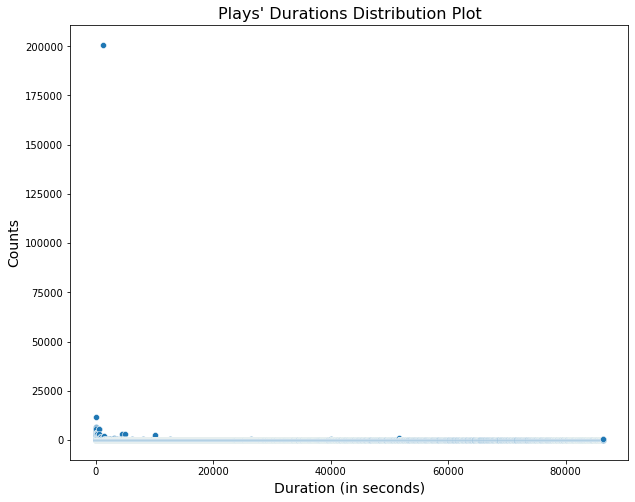

In [29]:
# premium
DURATION = df['duration'].unique()
df_duration = df[['duration']].value_counts()
df_duration = pd.pivot_table(df_duration.to_frame(), values=0, index=DURATION, aggfunc=np.sum)
df_duration = df_duration.reset_index()
df_duration  = df_duration.rename(columns={'index':'duration', 0: 'Counts'})

plt.figure(figsize=(10,8))
plt.title("Plays' Durations Distribution Plot", fontsize=16)
sns.scatterplot(data=df_duration, x='duration', y='Counts')
plt.xlabel('Duration (in seconds)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.show()

## Bivariate/Multivariate Analysis

   is_login playback_location  Counts
0     False            direct  197537
2      True            direct  168309
1     False             embed  374793
3      True             embed    1943


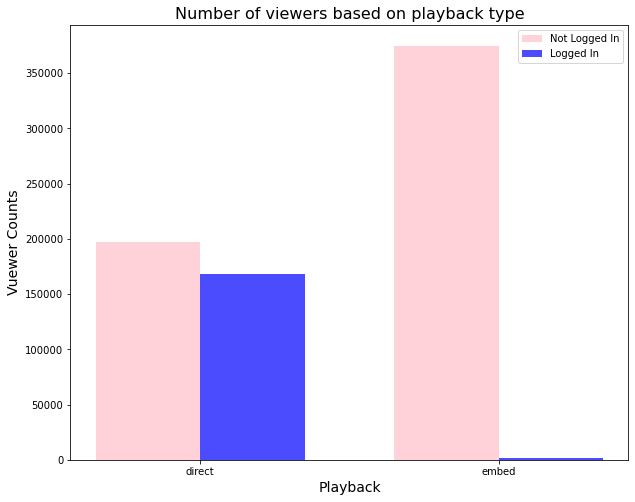

In [30]:
# number of viewers based on login status and playback location
df_login_playback = df[['is_login', 'playback_location']].value_counts()
df_login_playback = pd.pivot_table(df_login_playback.to_frame(), values=0, index=['is_login', 'playback_location'], aggfunc=np.sum)
df_login_playback = df_login_playback.reset_index()
df_login_playback = df_login_playback.rename(columns={0: 'Counts'})

df_login_playback = df_login_playback.sort_values(by=['playback_location'])
print(df_login_playback)

x = np.arange(len(PLAYBACK))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_playback[df_login_playback['is_login'] == 0]['Counts'], width, label='Not Logged In', color='pink', alpha=.7)
ax.bar(x + width/2, df_login_playback[df_login_playback['is_login'] == 1]['Counts'], width, label='Logged In', color='blue', alpha=.7)

ax.set_title('Number of viewers based on playback type', fontsize=16)
ax.set_ylabel('Vuewer Counts', fontsize=14)
ax.set_xlabel('Playback', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_playback['playback_location'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

    is_login     platform  Counts
0      False  app-android   43289
7       True  app-android  137489
1      False      app-ios    2888
8       True      app-ios    9664
2      False   tv-android   31008
9       True   tv-android   10371
3      False     tv-tizen    2557
10      True     tv-tizen    4496
4      False     tv-webos    1165
11      True     tv-webos       3
5      False  web-desktop   67658
12      True  web-desktop    3682
6      False   web-mobile  423765
13      True   web-mobile    4547


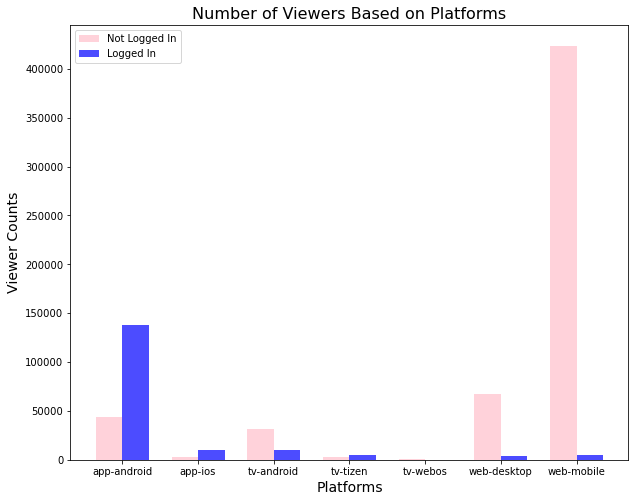

In [75]:
# number of viewers based on login status and platform
df_login_platform = df[['is_login', 'platform']].value_counts()
df_login_platform = pd.pivot_table(df_login_platform.to_frame(), values=0, index=['is_login', 'platform'], aggfunc=np.sum)
df_login_platform = df_login_platform.reset_index()
df_login_platform = df_login_platform.rename(columns={0: 'Counts'})

df_login_platform = df_login_platform.sort_values(by=['platform'])
print(df_login_platform)

x = np.arange(len(PLATFORMS))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_platform[df_login_platform['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_platform[df_login_platform['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Platforms', fontsize=16)
ax.set_xlabel('Platforms', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_platform['platform'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

    autoplay     platform  Counts
0      False  app-android    3658
4       True  app-android   50720
1      False      app-ios       1
5       True      app-ios    2716
6       True   tv-android    1959
11     False   tv-android       0
7       True     tv-tizen     691
12     False     tv-tizen       0
8       True     tv-webos       5
13     False     tv-webos       0
2      False  web-desktop    4250
9       True  web-desktop   34606
3      False   web-mobile  371940
10      True   web-mobile     869


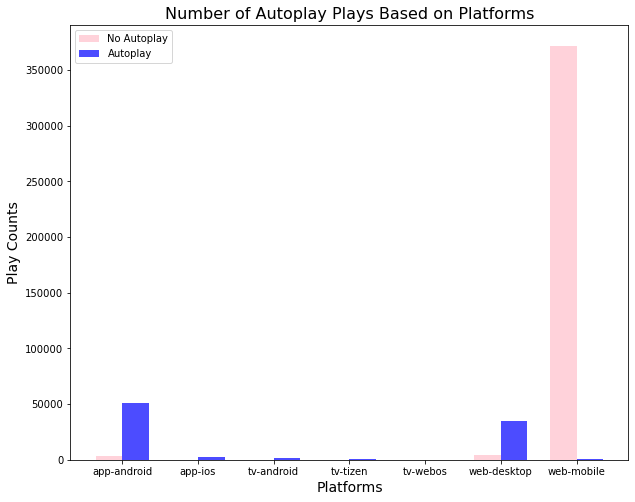

In [48]:
df_platform_autoplay = df[['autoplay', 'platform']].value_counts()
df_platform_autoplay = pd.pivot_table(df_platform_autoplay.to_frame(), values=0, index=['autoplay', 'platform'], aggfunc=np.sum)
df_platform_autoplay = df_platform_autoplay.reset_index()
df_platform_autoplay = df_platform_autoplay.rename(columns={0: 'Counts'})

i = len(df_platform_autoplay)
for cat in df_platform_autoplay[df_platform_autoplay['autoplay'] == 0]['platform'].tolist():
    if cat not in df_platform_autoplay[df_platform_autoplay['autoplay'] == 1]['platform'].tolist():
        df_platform_autoplay.loc[i] = [True, cat, 0]
        i += 1

for cat in df_platform_autoplay[df_platform_autoplay['autoplay'] == 1]['platform'].tolist():
    if cat not in df_platform_autoplay[df_platform_autoplay['autoplay'] == 0]['platform'].tolist():
        df_platform_autoplay.loc[i] = [False, cat, 0]
        i += 1

df_platform_autoplay = df_platform_autoplay.sort_values(by=['platform'])
print(df_platform_autoplay)

x = np.arange(len(df_platform_autoplay['platform'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_platform_autoplay[df_platform_autoplay['autoplay'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_platform_autoplay[df_platform_autoplay['autoplay'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Autoplay Plays Based on Platforms', fontsize=16)
ax.set_xlabel('Platforms', fontsize=14)
ax.set_ylabel('Play Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_platform_autoplay['platform'].unique())
ax.legend(['No Autoplay', 'Autoplay'])

plt.show()

   is_login bitrate_range  Counts
0     False         0-200  228243
1     False       200-500  318596
2     False       unknown   25491
3      True         0-200    9245
4      True       200-500  151411
5      True       unknown    9596


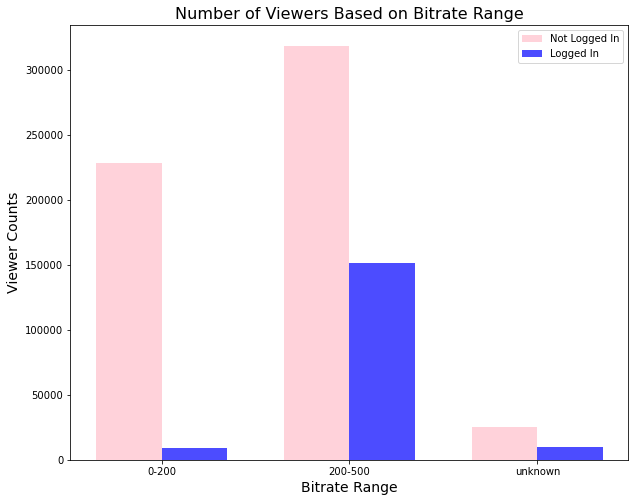

In [32]:
# number of viewers based on login status and bitrate range
df_login_bitrange = df[['is_login', 'bitrate_range']].value_counts()
df_login_bitrange = pd.pivot_table(df_login_bitrange.to_frame(), values=0, index=['is_login', 'bitrate_range'], aggfunc=np.sum)
df_login_bitrange = df_login_bitrange.reset_index()
df_login_bitrange = df_login_bitrange.rename(columns={0: 'Counts'})

print(df_login_bitrange)

x = np.arange(len(BITRANGE))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_bitrange[df_login_bitrange['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_bitrange[df_login_bitrange['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Bitrate Range', fontsize=16)
ax.set_xlabel('Bitrate Range', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_bitrange['bitrate_range'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

    is_login referrer_group  Counts
0      False           bola   20517
17      True           bola     351
18      True        bolanet     280
1      False        bolanet   16769
2      False         brilio       1
32      True         brilio       0
3      False          dream   44818
19      True          dream      69
20      True          empty    7107
4      False          empty   33356
5      False          emtek     772
21      True          emtek      14
6      False       facebook     667
22      True       facebook       5
7      False         fimela    3840
23      True         fimela      22
8      False         google   23674
24      True         google     535
25      True       internal    4895
9      False       internal   74124
10     False      kapanlagi  107992
26      True      kapanlagi     252
27      True       liputan6     495
11     False       liputan6   73405
28      True        merdeka     240
12     False        merdeka   76465
29      True         others 

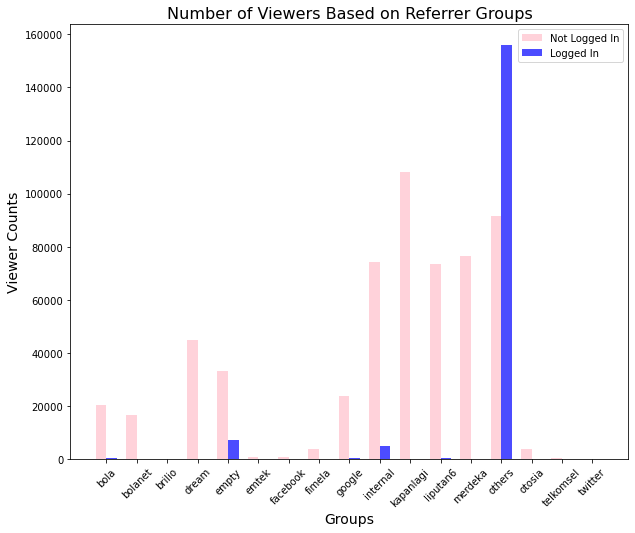

In [33]:
# number of viewers based on login status and referrer groups
df_login_refgroup = df[['is_login', 'referrer_group']].value_counts()
df_login_refgroup = pd.pivot_table(df_login_refgroup.to_frame(), values=0, index=['is_login', 'referrer_group'], aggfunc=np.sum)
df_login_refgroup = df_login_refgroup.reset_index()
df_login_refgroup = df_login_refgroup.rename(columns={0: 'Counts'})

i = len(df_login_refgroup)
for ref in df_login_refgroup[df_login_refgroup['is_login'] == 0]['referrer_group'].tolist():
    if ref not in df_login_refgroup[df_login_refgroup['is_login'] == 1]['referrer_group'].tolist():
        row = pd.DataFrame([True, ref, 0])
        df_login_refgroup.loc[i] = [True, ref, 0]
        i += 1

df_login_refgroup = df_login_refgroup.sort_values(by=['referrer_group'])
print(df_login_refgroup.sort_values(by=['referrer_group']))

x = np.arange(len(GROUP))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_refgroup[df_login_refgroup['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_refgroup[df_login_refgroup['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Referrer Groups', fontsize=16)
ax.set_xlabel('Groups', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_refgroup['referrer_group'].unique(), rotation=45)
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

    is_login         os_name  Counts
0      False         Android  397938
16      True         Android    4180
1      False   BlackBerry OS      17
26      True   BlackBerry OS       0
2      False       Chrome OS      68
17      True       Chrome OS       3
27      True          Fedora       0
3      False          Fedora       1
28      True      Firefox OS       0
4      False      Firefox OS       2
18      True           Linux      67
5      False           Linux    1013
19      True        Mac OS X     240
6      False        Mac OS X    2707
20      True           Other       5
7      False           Other      96
21      True             REL    2489
8      False             REL    5117
29      True         Red Hat       0
9      False         Red Hat       1
10     False  Symbian^3 Anna       1
30      True  Symbian^3 Anna       0
11     False           Tizen     214
22      True           Tizen      16
12     False          Ubuntu     152
23      True          Ubuntu      11
2

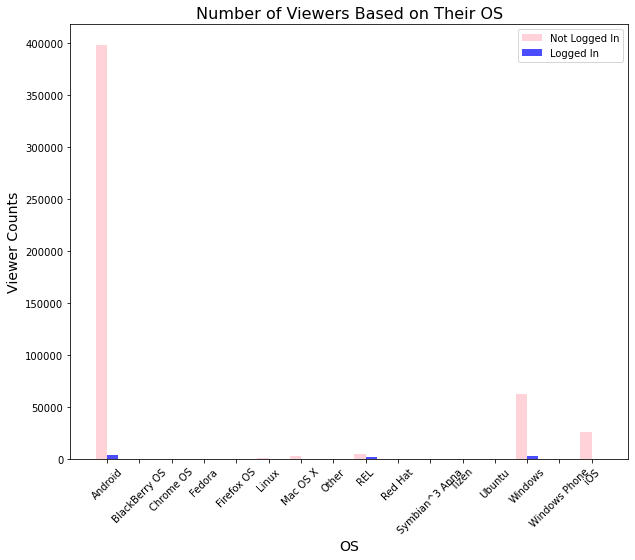

In [34]:
# number of viewers based on login status and operating system (os)
df_login_os = df[['is_login', 'os_name']].value_counts()
df_login_os = pd.pivot_table(df_login_os.to_frame(), values=0, index=['is_login', 'os_name'], aggfunc=np.sum)
df_login_os = df_login_os.reset_index()
df_login_os = df_login_os.rename(columns={0: 'Counts'})

i = len(df_login_os)
for os in df_login_os[df_login_os['is_login'] == 0]['os_name'].tolist():
    if os not in df_login_os[df_login_os['is_login'] == 1]['os_name'].tolist():
        df_login_os.loc[i] = [True, os, 0]
        i += 1

df_login_os = df_login_os.sort_values(by=['os_name'])
print(df_login_os)

new_OS = np.delete(OS, 4)
x = np.arange(len(new_OS))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_os[df_login_os['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_os[df_login_os['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Their OS', fontsize=16)
ax.set_xlabel('OS', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_os['os_name'].unique(), rotation=45)
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

    is_login           browser_name  Counts
4      False                 Chrome   53828
11      True                 Chrome       0
5      False          Chrome Mobile  138080
12      True          Chrome Mobile       0
6      False  Chrome Mobile WebView   58139
13      True  Chrome Mobile WebView       0
14      True               Facebook       0
22     False               Facebook       0
23     False                Firefox       0
15      True                Firefox       0
24     False                   LINE    6377
16      True                   LINE       0
27     False            MiuiBrowser    7751
17      True            MiuiBrowser       0
28     False          Mobile Safari   11830
18      True          Mobile Safari       0
19      True           Opera Mobile       0
37     False           Opera Mobile   15612
43     False       Samsung Internet   15972
20      True       Samsung Internet       0
21      True             UC Browser       0
46     False             UC Brow

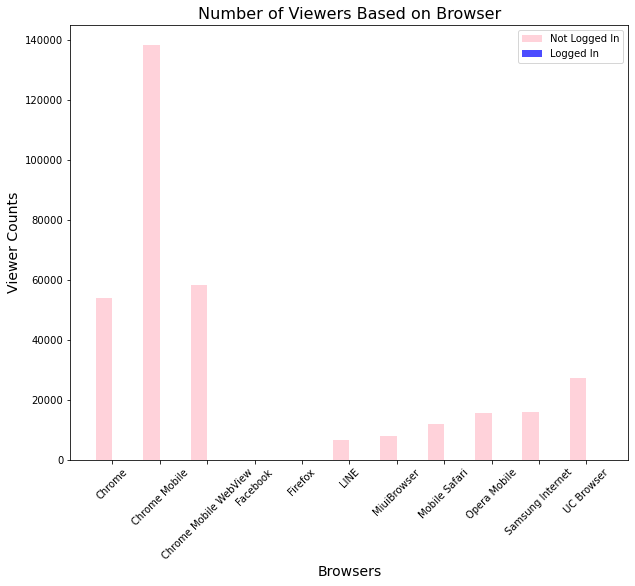

In [35]:
# number of viewers based on login status and browser
df_login_browser = df[['is_login', 'browser_name']].value_counts()
df_login_browser = pd.pivot_table(df_login_browser.to_frame(), values=0, index=['is_login', 'browser_name'], aggfunc=np.sum)
df_login_browser = df_login_browser.reset_index()
df_login_browser = df_login_browser.rename(columns={0: 'Counts'})
df_login_browser = df_login_browser[df_login_browser['Counts'] >= df_login_browser['Counts'].mean()]

i = len(df_login_browser)
for browser in df_login_browser[df_login_browser['is_login'] == 0]['browser_name'].tolist():
    if browser not in df_login_browser[df_login_browser['is_login'] == 1]['browser_name'].tolist():
        df_login_browser.loc[i] = [True, browser, 0]
        i += 1

for browser in df_login_browser[df_login_browser['is_login'] == 1]['browser_name'].tolist():
    if browser not in df_login_browser[df_login_browser['is_login'] == 0]['browser_name'].tolist():
        df_login_browser.loc[i] = [False, browser, 0]
        i += 1
        
df_login_browser = df_login_browser.sort_values(by=['browser_name'])
print(df_login_browser)

x = np.arange(len(df_login_browser['browser_name'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_browser[df_login_browser['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_browser[df_login_browser['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Browser', fontsize=16)
ax.set_xlabel('Browsers', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_browser['browser_name'].unique(), rotation=45)
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

   is_login  app_name  Counts
0     False      bola      61
4      True      bola       0
1     False  liputan6      82
5      True  liputan6       0
2     False     vidio  572187
3      True     vidio  170252


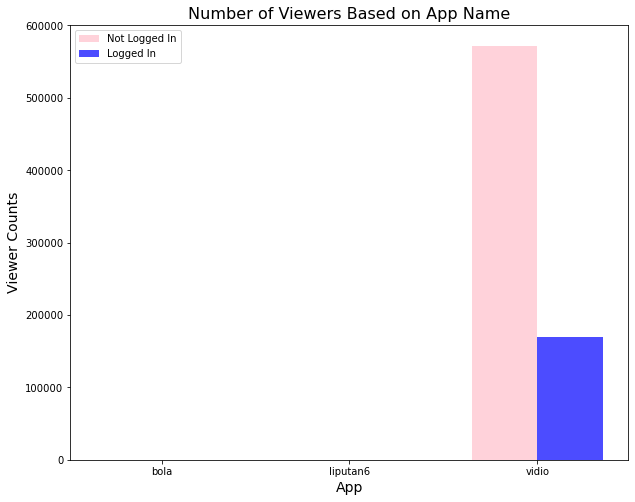

In [36]:
# number of viewers based on login status and app name
df_login_app = df[['is_login', 'app_name']].value_counts()
df_login_app = pd.pivot_table(df_login_app.to_frame(), values=0, index=['is_login', 'app_name'], aggfunc=np.sum)
df_login_app = df_login_app.reset_index()
df_login_app = df_login_app.rename(columns={0: 'Counts'})
df_login_app = df_login_app.sort_values(by=['app_name'])

i = len(df_login_app)
for app in df_login_app[df_login_app['is_login'] == 0]['app_name'].tolist():
    if app not in df_login_app[df_login_app['is_login'] == 1]['app_name'].tolist():
        df_login_app.loc[i] = [True, app, 0]
        i += 1
        
for app in df_login_app[df_login_app['is_login'] == 1]['app_name'].tolist():
    if app not in df_login_app[df_login_app['is_login'] == 0]['app_name'].tolist():
        df_login_app.loc[i] = [False, app, 0]
        i += 1

df_login_app = df_login_app.sort_values(by=['app_name'])
print(df_login_app)

x = np.arange(len(df_login_app['app_name'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_app[df_login_app['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_app[df_login_app['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on App Name', fontsize=16)
ax.set_xlabel('App', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_app['app_name'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

   is_login   content_type  Counts
0     False        catchup    1395
3      True        catchup    1453
1     False  livestreaming  151693
4      True  livestreaming  119327
2     False            vod  419242
5      True            vod   49472


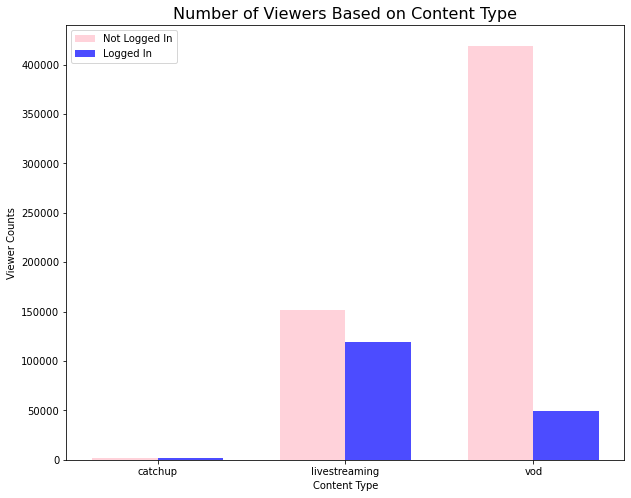

In [37]:
# number of viewers based on login status and content type
df_login_content = df[['is_login', 'content_type']].value_counts()
df_login_content = pd.pivot_table(df_login_content.to_frame(), values=0, index=['is_login', 'content_type'], aggfunc=np.sum)
df_login_content = df_login_content.reset_index()
df_login_content = df_login_content.rename(columns={0: 'Counts'})
        
df_login_content = df_login_content.sort_values(by=['content_type'])
print(df_login_content)

x = np.arange(len(df_login_content['content_type'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_content[df_login_content['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_content[df_login_content['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Content Type', fontsize=16)
ax.set_xlabel('Content Type')
ax.set_ylabel('Viewer Counts')
ax.set_xticks(x)
ax.set_xticklabels(df_login_content['content_type'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

   is_login  stream_type  Counts
0     False  EventStream    4183
2      True  EventStream    1847
1     False     TvStream  147510
3      True     TvStream  117480


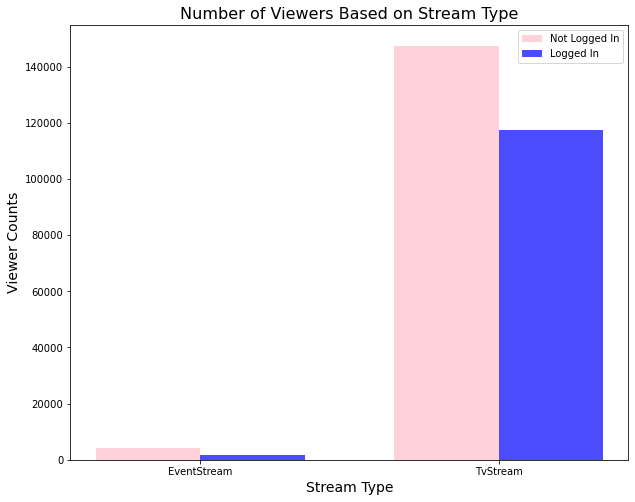

In [38]:
# number of viewers based on login status and stream type
df_login_stream = df[['is_login', 'stream_type']].value_counts()
df_login_stream = pd.pivot_table(df_login_stream.to_frame(), values=0, index=['is_login', 'stream_type'], aggfunc=np.sum)
df_login_stream = df_login_stream.reset_index()
df_login_stream = df_login_stream.rename(columns={0: 'Counts'})
        
df_login_stream = df_login_stream.sort_values(by=['stream_type'])
print(df_login_stream)

x = np.arange(len(df_login_stream['stream_type'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_stream[df_login_stream['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_stream[df_login_stream['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Stream Type', fontsize=16)
ax.set_xlabel('Stream Type', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_stream['stream_type'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

   is_login  is_premium  Counts
0     False       False  572200
2      True       False  163974
1     False        True     130
3      True        True    6278


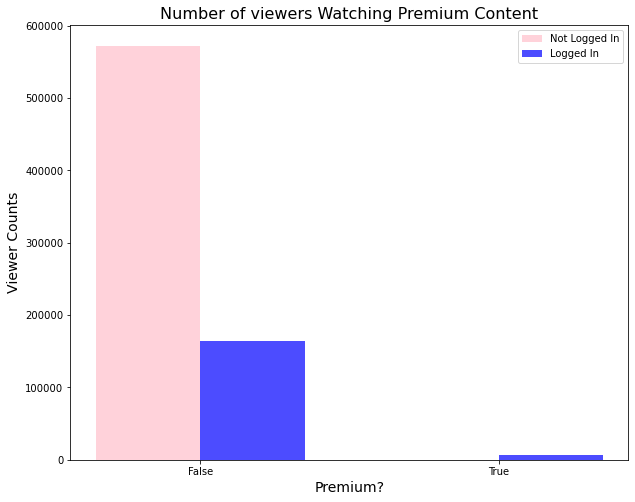

In [39]:
# number of viewers based on login status and premium
df_login_premium = df[['is_login', 'is_premium']].value_counts()
df_login_premium = pd.pivot_table(df_login_premium.to_frame(), values=0, index=['is_login', 'is_premium'], aggfunc=np.sum)
df_login_premium = df_login_premium.reset_index()
df_login_premium = df_login_premium.rename(columns={0: 'Counts'})
        
df_login_premium = df_login_premium.sort_values(by=['is_premium'])
print(df_login_premium)

x = np.arange(len(df_login_premium['is_premium'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_premium[df_login_premium['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_premium[df_login_premium['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of viewers Watching Premium Content', fontsize=16)
ax.set_xlabel('Premium?', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_premium['is_premium'].unique())
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

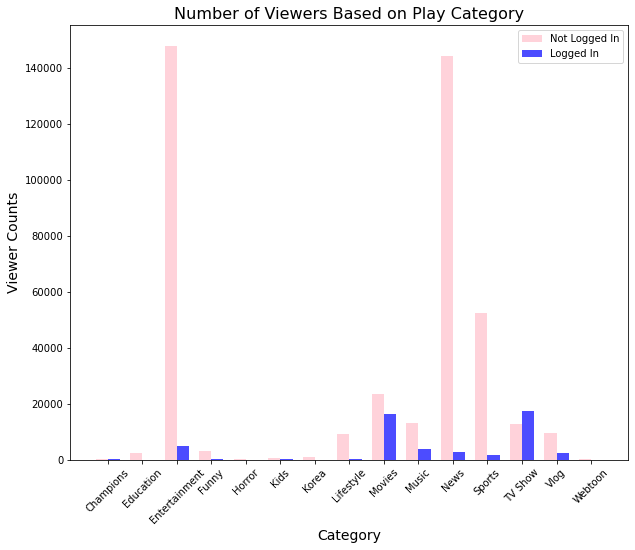

In [40]:
# number of viewers based on login status and play category
df_login_category = df[['is_login', 'category_name']].value_counts()
df_login_category = pd.pivot_table(df_login_category.to_frame(), values=0, index=['is_login', 'category_name'], aggfunc=np.sum)
df_login_category = df_login_category.reset_index()
df_login_category = df_login_category.rename(columns={0: 'Counts'})
        
df_login_category = df_login_category.sort_values(by=['category_name'])

x = np.arange(len(df_login_category['category_name'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_login_category[df_login_category['is_login'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_login_category[df_login_category['is_login'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Viewers Based on Play Category', fontsize=16)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_login_category['category_name'].unique(), rotation=45)
ax.legend(['Not Logged In', 'Logged In'])

plt.show()

    has_ad  category_name  Counts
0    False      Champions      12
15    True      Champions     471
1    False      Education      34
16    True      Education    2638
2    False  Entertainment    2666
17    True  Entertainment  150152
3    False          Funny     115
18    True          Funny    3206
4    False         Horror      29
19    True         Horror     188
5    False           Kids     416
20    True           Kids     734
6    False          Korea      29
21    True          Korea    1053
7    False      Lifestyle     303
22    True      Lifestyle    9195
23    True         Movies   34167
8    False         Movies    5761
9    False          Music     542
24    True          Music   16451
25    True           News  144525
10   False           News    2573
26    True         Sports   52434
11   False         Sports    1535
27    True        TV Show   28517
12   False        TV Show    1664
28    True           Vlog   11414
13   False           Vlog     552
14   False    

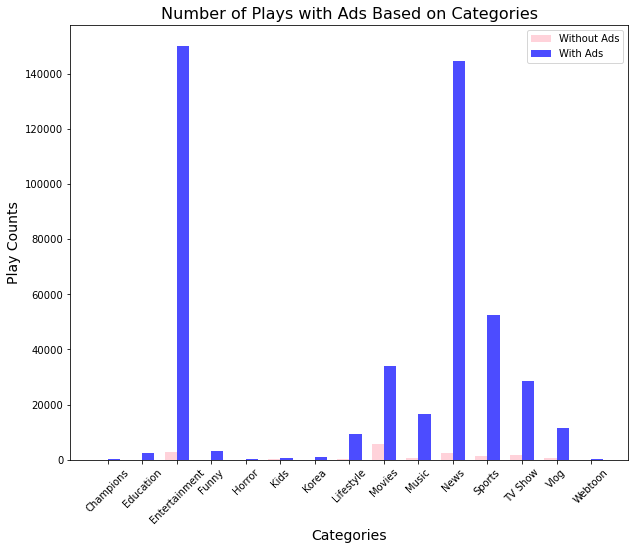

In [46]:
# number of plays that have ads based on category
df_ad_category = df[['has_ad', 'category_name']].value_counts()
df_ad_category = pd.pivot_table(df_ad_category.to_frame(), values=0, index=['has_ad', 'category_name'], aggfunc=np.sum)
df_ad_category = df_ad_category.reset_index()
df_ad_category = df_ad_category.rename(columns={0: 'Counts'})
        
df_ad_category = df_ad_category.sort_values(by=['category_name'])
print(df_ad_category)

x = np.arange(len(df_ad_category['category_name'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_ad_category[df_ad_category['has_ad'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_ad_category[df_ad_category['has_ad'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Plays with Ads Based on Categories', fontsize=16)
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Play Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_ad_category['category_name'].unique(), rotation=45)
ax.legend(['Without Ads', 'With Ads'])

plt.show()

    is_premium  category_name  Counts
0        False      Champions     483
24        True      Champions       0
1        False      Education    2659
15        True      Education      13
2        False  Entertainment  152800
16        True  Entertainment      18
3        False          Funny    3318
17        True          Funny       3
4        False         Horror     217
25        True         Horror       0
5        False           Kids    1141
18        True           Kids       9
19        True          Korea       3
6        False          Korea    1079
20        True      Lifestyle       4
7        False      Lifestyle    9494
8        False         Movies   36625
21        True         Movies    3303
26        True          Music       0
9        False          Music   16993
27        True           News       0
10       False           News  147098
22        True         Sports       7
11       False         Sports   53962
12       False        TV Show   30181
28        Tr

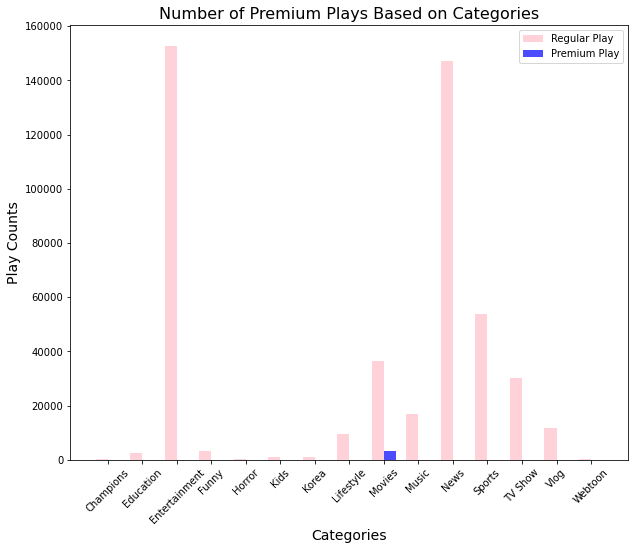

In [47]:
# number of plays that contains premium content based on category
df_premium_category = df[['is_premium', 'category_name']].value_counts()
df_premium_category = pd.pivot_table(df_premium_category.to_frame(), values=0, index=['is_premium', 'category_name'], aggfunc=np.sum)
df_premium_category = df_premium_category.reset_index()
df_premium_category = df_premium_category.rename(columns={0: 'Counts'})

i = len(df_premium_category)
for cat in df_premium_category[df_premium_category['is_premium'] == 0]['category_name'].tolist():
    if cat not in df_premium_category[df_premium_category['is_premium'] == 1]['category_name'].tolist():
        df_premium_category.loc[i] = [True, cat, 0]
        i += 1

for cat in df_premium_category[df_premium_category['is_premium'] == 1]['category_name'].tolist():
    if cat not in df_premium_category[df_premium_category['is_premium'] == 0]['category_name'].tolist():
        df_premium_category.loc[i] = [False, cat, 0]
        i += 1

df_premium_category = df_premium_category.sort_values(by=['category_name'])
print(df_premium_category)

x = np.arange(len(df_premium_category['category_name'].unique()))
width = 0.35

fig, ax = plt.subplots(figsize=(10,8))

ax.bar(x - width/2, df_premium_category[df_premium_category['is_premium'] == 0]['Counts'], width, color='pink', alpha=.7)
ax.bar(x + width/2, df_premium_category[df_premium_category['is_premium'] == 1]['Counts'], width, color='blue', alpha=.7)

ax.set_title('Number of Premium Plays Based on Categories', fontsize=16)
ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Play Counts', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_premium_category['category_name'].unique(), rotation=45)
ax.legend(['Regular Play', 'Premium Play'])

plt.show()

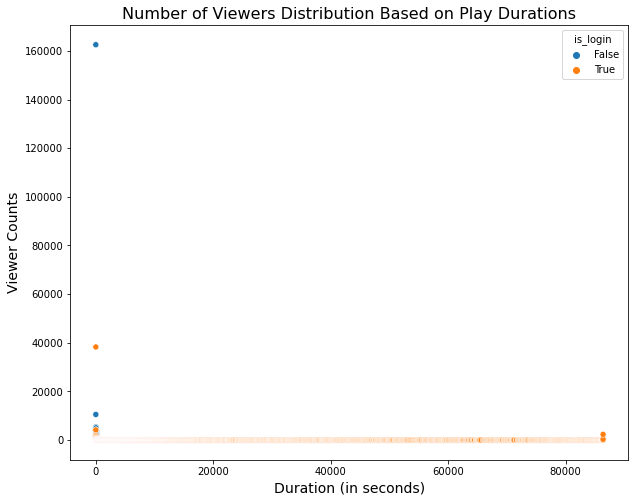

In [54]:
# number of viewers based on login status and play duration
df_login_duration = df[['is_login', 'duration']].value_counts()
df_login_duration = pd.pivot_table(df_login_duration.to_frame(), values=0, index=['is_login', 'duration'], aggfunc=np.sum)
df_login_duration = df_login_duration.reset_index()
df_login_duration = df_login_duration.rename(columns={0: 'Counts'})

fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title('Number of Viewers Distribution Based on Play Durations', fontsize=16)
sns.scatterplot(data=df_login_duration, x='duration', y='Counts', hue='is_login', ax=ax)

ax.set_xlabel('Duration (in seconds)', fontsize=14)
ax.set_ylabel('Viewer Counts', fontsize=14)

plt.show()


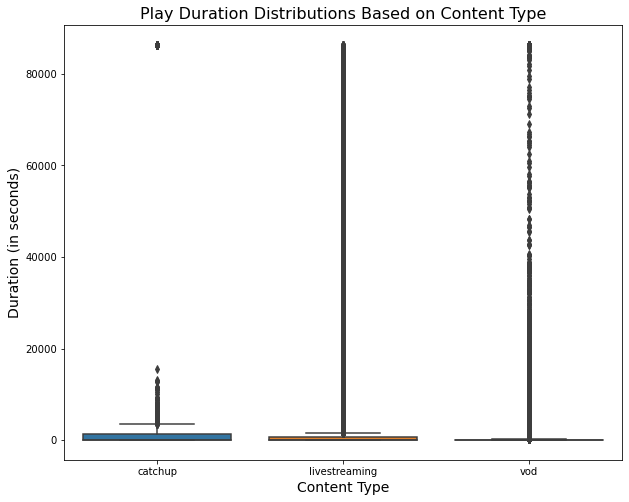

In [42]:
# number of viewers based on content type and play duration
df_content_duration = df[['content_type', 'duration']]
df_content_duration = df_content_duration.sort_values(by=['content_type'])

fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title('Play Duration Distributions Based on Content Type', fontsize=16)
sns.boxplot(data=df_content_duration, x='content_type', y='duration', ax=ax)

ax.set_xlabel('Content Type', fontsize=14)
ax.set_ylabel('Duration (in seconds)', fontsize=14)
ax.set_xticklabels(sorted(df['content_type'].unique()))

plt.show()

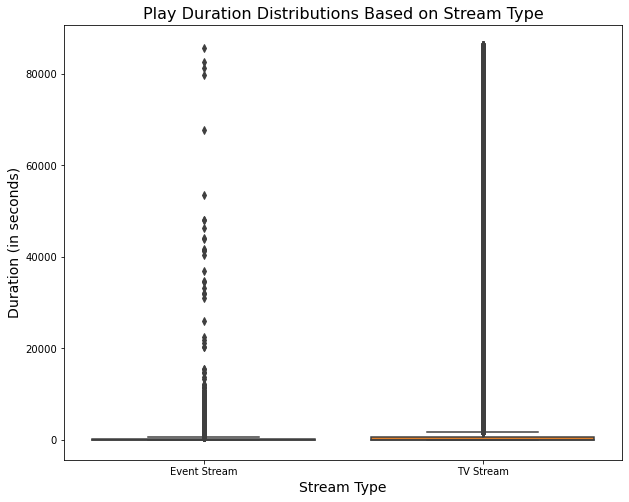

In [88]:
# number of viewers based on stream type and play duration
df_stream_duration = df[['stream_type', 'duration']]
df_stream_duration = df_stream_duration.sort_values(by=['stream_type'])

fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title('Play Duration Distributions Based on Stream Type', fontsize=16)
sns.boxplot(data=df_stream_duration, x='stream_type', y='duration', ax=ax)

ax.set_xlabel('Stream Type', fontsize=14)
ax.set_ylabel('Duration (in seconds)', fontsize=14)
ax.set_xticklabels(['Event Stream', 'TV Stream'])

plt.show()

In [83]:
df['stream_type'].unique()

array([nan, 'TvStream', 'EventStream'], dtype=object)

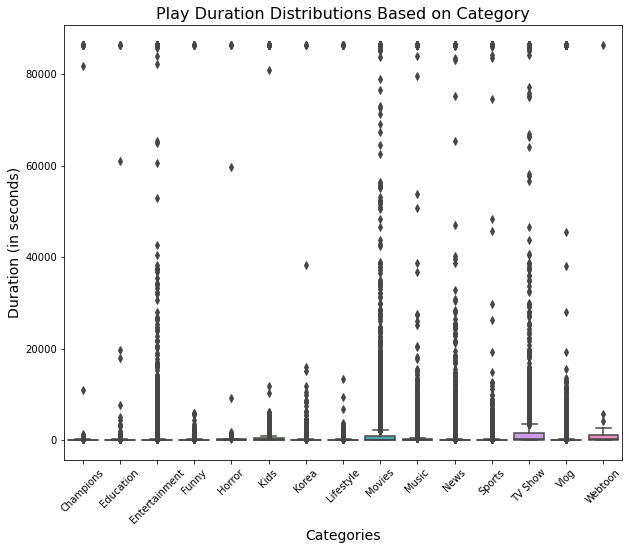

In [43]:
# number of viewers based on category and play duration
df_category_duration = df[['category_name', 'duration']]
df_category_duration = df_category_duration.sort_values(by=['category_name'])

fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title('Play Duration Distributions Based on Category', fontsize=16)
sns.boxplot(data=df_category_duration, x='category_name', y='duration', ax=ax)

ax.set_xlabel('Categories', fontsize=14)
ax.set_ylabel('Duration (in seconds)', fontsize=14)
ax.set_xticklabels(sorted(df['category_name'].dropna().unique()), rotation=45)

plt.show()

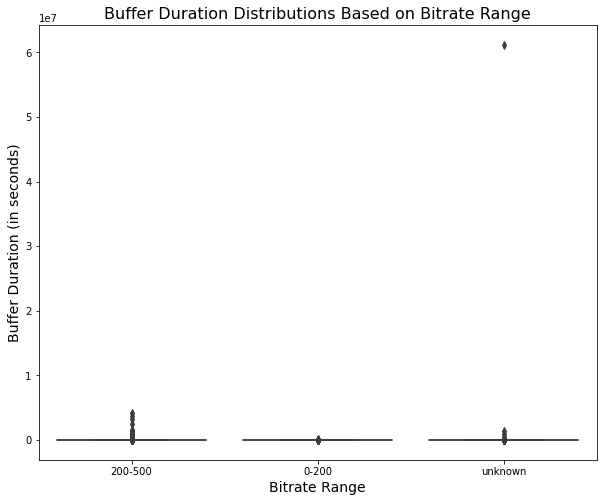

In [44]:
# number of viewers based on bitrate range and buffer duration
df_bitrange_buffer = df[['bitrate_range', 'buffer_duration']]

fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.set_title('Buffer Duration Distributions Based on Bitrate Range', fontsize=16)
sns.boxplot(data=df_bitrange_buffer, x='bitrate_range', y='buffer_duration', ax=ax)

ax.set_xlabel('Bitrate Range', fontsize=14)
ax.set_ylabel('Buffer Duration (in seconds)', fontsize=14)

plt.show()

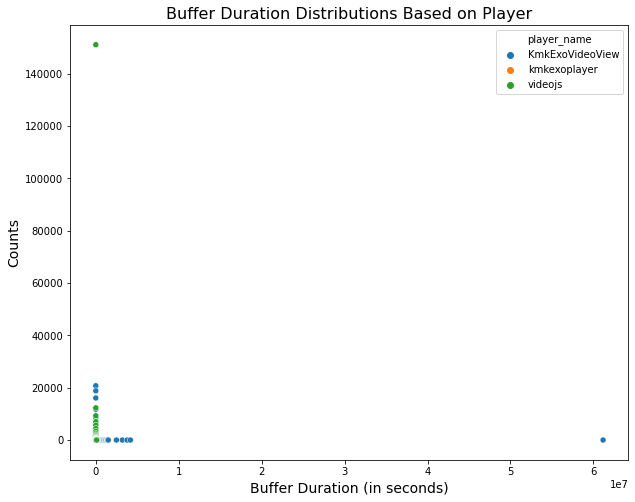

In [45]:
df_player_buffer = df[['player_name', 'buffer_duration']].value_counts()
df_player_buffer = pd.pivot_table(df_player_buffer.to_frame(), values=0, index=['player_name', 'buffer_duration'], aggfunc=np.sum)
df_player_buffer = df_player_buffer.reset_index()
df_player_buffer = df_player_buffer.rename(columns={0: 'Counts'})

fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('Buffer Duration Distributions Based on Player', fontsize=16)
sns.scatterplot(data=df_player_buffer, x='buffer_duration', y='Counts', hue='player_name')

ax.set_xlabel('Buffer Duration (in seconds)', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)

plt.show()

## Question 5: Could you list top 10 visitors by using play_duration per day?

In [49]:
time_list = []
start = df['play_time']
for s in start:
    day = dateutil.parser.parse(s).date()
    date_format = '{}-{}-{}'.format(day.day, day.month, day.year)
    time_list.append(date_format)
        
df['visit_time'] = time_list

In [50]:
df_q5 = df[['hash_watcher_id' ,'visit_time', 'play_duration']]
df_q5_pivot = pd.pivot_table(df_q5, values='play_duration', index=['hash_watcher_id'], columns=['visit_time'], fill_value=0)
df_q5_pivot = df_q5_pivot.reset_index()
df_q5_pivot.index = df_q5_pivot.index.set_names(['index'])

unique_time_list = df['visit_time'].unique().tolist()
for time in sorted(unique_time_list):
    per_day = df_q5_pivot[['hash_watcher_id', time]].sort_values(by=time, ascending=False)[:10]
    print('Top 10 visitor on {} (sorted by duration):\n{}\n'.format(time, per_day))

Top 10 visitor on 1-2-2020 (sorted by duration):
visit_time                                    hash_watcher_id  1-2-2020
index                                                                  
365040      90d7ad72d3654651578d79f419d9b6e6db686fd9434c31...   58725.0
471286      bb0de967a76e2d5a2d8db4b149007b226c0d648509112e...   44850.0
280984      6f84b0f2ad1ea59d75508524f2086660fb3c57fee20b8c...   43230.0
600860      ee9cf45b99998761942a7d5598833e74501fecd1590cb7...   37140.0
282379      7016235109ffa7112d48d393d85b6201241cfcb117ffdd...   34185.0
527022      d130dc42a9444835c27bb69f4f7288dea41f689a531f13...   32475.0
36584       0e8e3ed229cf18ad9a0fd8302699a4627fcdd9e6c7a9ae...   28050.0
100126      27b6f6afe0bfaed18706af84b211ccb04d25ae73597ff5...   27840.0
570790      e2990e2b6c4532957cb25755115fcfdf4e1967776c641a...   27570.0
301397      77a15528eb0a0518234257292ee1e7e8b8a3859e8f0255...   26760.0

Top 10 visitor on 10-2-2020 (sorted by duration):
visit_time                          